# Jupyter notebook for plotting Figure 1 in "Conformal Validity Guarnatees Exist for Any Data Distribution" (ICML 2024)

Notebook by Drew Prinster (drew@cs.jhu.edu)

Last updated May 12th, 2024

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os

## Full CP for multistep FCS plotting

,seed,step,dataset,muh_fun,method,coverage,width,muh_test,y_test
0,0,1,blue,ridge,full_ex,1.0,1.08,1.213466,1.478570
1,0,1,blue,ridge,full_1fcs,1.0,2.22,1.213466,1.478570
2,0,1,blue,ridge,full_mfcs,1.0,2.22,1.213466,1.478570
3,0,2,blue,ridge,full_ex,1.0,0.92,1.479803,1.594841
4,0,2,blue,ridge,full_1fcs,1.0,2.22,1.479803,1.594841
...,...,...,...,...,...,...,...,...,...
14995,999,4,blue,ridge,full_1fcs,1.0,2.22,1.533027,1.495551
14996,999,4,blue,ridge,full_mfcs,1.0,2.22,1.533027,1.495551
14997,999,5,blue,ridge,full_ex,1.0,1.00,1.514294,1.571743
14998,999,5,blue,ridge,full_1fcs,1.0,2.22,1.514294,1.571743


num seeds =  1000


/tmp/ipykernel_838944/3068133959.py:57: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Ex_FullCP_cov = data[data['method']=='full_ex'].groupby(['step']).mean()['coverage']
/tmp/ipykernel_838944/3068133959.py:60: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  FCS1_FullCP_cov = data[data['method']=='full_1fcs'].groupby(['step']).mean()['coverage']
/tmp/ipykernel_838944/3068133959.py:63: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the f

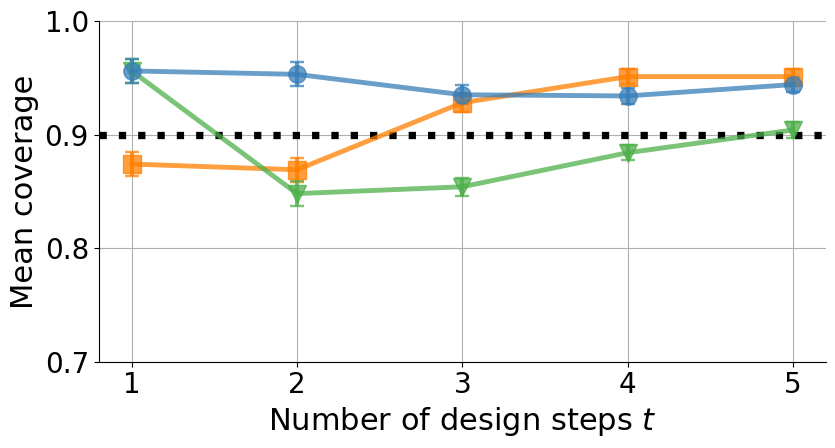

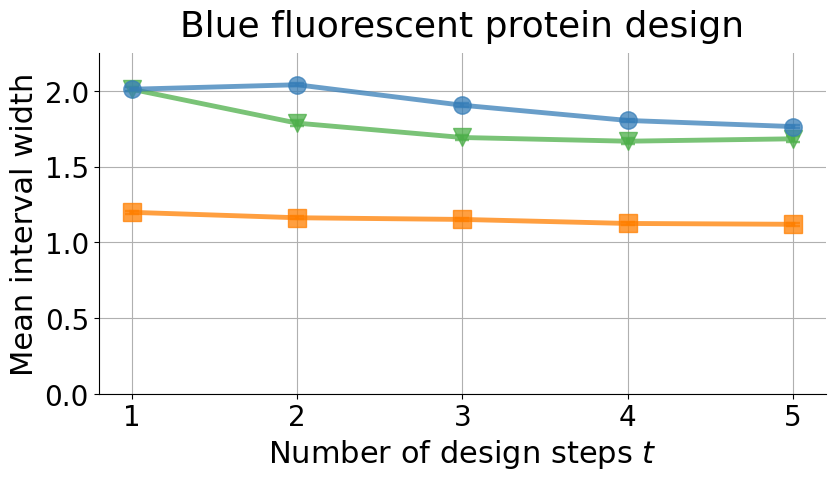

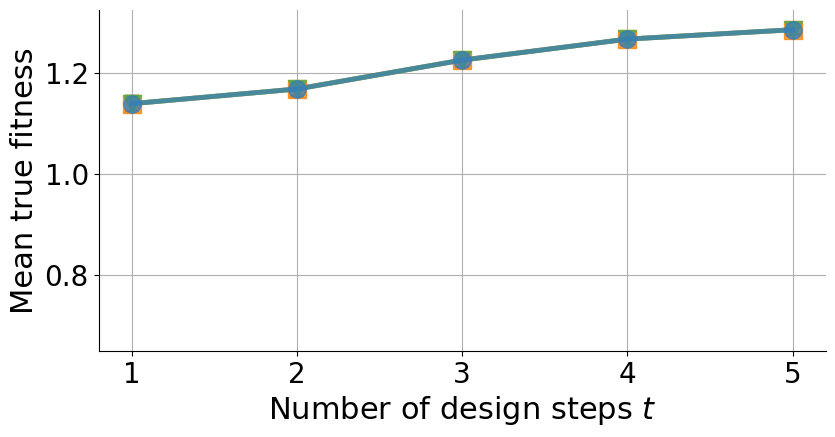

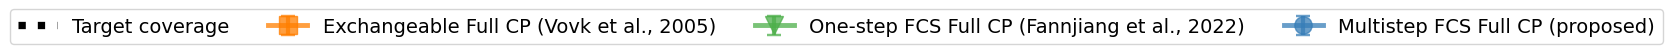

In [3]:
## Read in data
flur_color = 'blue'
n_init_str = '32'
lmbda_str = '8'
reg_str = '0.01'
n_steps_str = '5'
n_seeds_str = '1000'
plt_legend = True

data = pd.read_csv('./results/2024-01-24_FullCPMultistepDesignExpts_' + flur_color + '_ridge_ntrain_init'+ n_init_str +'_steps'+n_steps_str+'_nseed'+n_seeds_str+'_lmbda'+lmbda_str+'_reg'+reg_str+'_depth2_seedinit0_PIs_replaceTrue_v2.csv')
display(data)



plt.rc("axes.spines", top=False, right=False)
# avoid Type 3 fonts
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


muh_name = 'ridge'
ntrain = 64 ## 96, 192 ## 
metric = 'coverage'
n_seeds = len(set(data['seed']))
n_test = len(set(data['seed']))
print("num seeds = ", n_seeds)
capsize=5
capwidth=1.75
elinewidth=3



wid_q = 0.25
wid_e_color = 'gray'

CB_color_cycle = ['#ff7f00', '#4daf4a', '#377eb8',
                  '#e41a1c', '#984ea3', '#f781bf',  
                  '#999999', '#dede00', '#a65628']

## Plotting params
markersize=12.5
linewidth=3.5
transparency=0.75
linestyle_wid='--'
linestyle_fit='-.'
y_ax_label_size=22
x_ax_label_size=22
n_steps = 5

tick_sizes=20
suptitle_size=26




## Coverage
Ex_FullCP_cov = data[data['method']=='full_ex'].groupby(['step']).mean()['coverage']
Ex_FullCP_cov_stderr = np.array(data[data['method']=='full_ex'][['coverage', 'step']].groupby(['step']).std() / np.sqrt(n_seeds)).T[0]

FCS1_FullCP_cov = data[data['method']=='full_1fcs'].groupby(['step']).mean()['coverage']
FCS1_FullCP_cov_stderr = np.array(data[data['method']=='full_ex'][['coverage', 'step']].groupby(['step']).std() / np.sqrt(n_seeds)).T[0]

MFCS_FullCP_cov = data[data['method']=='full_mfcs'].groupby(['step']).mean()['coverage']
MFCS_FullCP_cov_stderr = np.array(data[data['method']=='full_ex'][['coverage', 'step']].groupby(['step']).std() / np.sqrt(n_seeds)).T[0]




## Width
Ex_FullCP_wid = data[data['method']=='full_ex'].groupby(['step']).mean()['width']
Ex_FullCP_wid_stderr = np.array(data[data['method']=='full_ex'][['width', 'step']].groupby(['step']).std() / np.sqrt(n_seeds)).T[0]

FCS1_FullCP_wid = data[data['method']=='full_1fcs'].groupby(['step']).mean()['width']
FCS1_FullCP_wid_stderr = np.array(data[data['method']=='full_1fcs'][['width', 'step']].groupby(['step']).std() / np.sqrt(n_seeds)).T[0]

MFCS_FullCP_wid = data[data['method']=='full_mfcs'].groupby(['step']).mean()['width']
MFCS_FullCP_wid_stderr = np.array(data[data['method']=='full_mfcs'][['width', 'step']].groupby(['step']).std() / np.sqrt(n_seeds)).T[0]



## Model performance
Ex_FullCP_fit = data[data['method']=='full_ex'].groupby(['step']).mean()['y_test'] # np.abs(data[data['method']=='full_ex'].groupby(['step'])['y_test'] - data[data['method']=='full_ex'].groupby(['step'])['muh_test']).mean()
Ex_FullCP_fit_stderr = np.array(data[data['method']=='full_ex'][['y_test', 'step']].groupby(['step']).std() / np.sqrt(n_seeds)).T[0] #np.array(data[data['method']=='full_ex'][['MSE', 'step']].groupby(['step']).std() / np.sqrt(n_seeds)).T[0]

FCS1_FullCP_fit = data[data['method']=='full_1fcs'].groupby(['step']).mean()['y_test'] # np.abs(data[data['method']=='full_ex'].groupby(['step'])['y_test'] - data[data['method']=='full_ex'].groupby(['step'])['muh_test']).mean()
FCS1_FullCP_fit_stderr = np.array(data[data['method']=='full_1fcs'][['y_test', 'step']].groupby(['step']).std() / np.sqrt(n_seeds)).T[0] #np.array(data[data['method']=='full_ex'][['MSE', 'step']].groupby(['step']).std() / np.sqrt(n_seeds)).T[0]

MFCS_FullCP_fit = data[data['method']=='full_mfcs'].groupby(['step']).mean()['y_test'] # np.abs(data[data['method']=='full_ex'].groupby(['step'])['y_test'] - data[data['method']=='full_ex'].groupby(['step'])['muh_test']).mean()
MFCS_FullCP_fit_stderr = np.array(data[data['method']=='full_mfcs'][['y_test', 'step']].groupby(['step']).std() / np.sqrt(n_seeds)).T[0] #np.array(data[data['method']=='full_ex'][['MSE', 'step']].groupby(['step']).std() / np.sqrt(n_seeds)).T[0]





## Plot coverage
fig1, ax1 = plt.subplots(figsize=(8, 4))
fig1.tight_layout()

(_, caps, _) = ax1.errorbar(range(1, n_steps+1), Ex_FullCP_cov[0:n_steps], marker='s', yerr = Ex_FullCP_cov_stderr[0:n_steps],  label = 'Exchangeable Full CP (Vovk et al., 2005)', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[0], ecolor = CB_color_cycle[0], capsize=capsize,elinewidth=elinewidth)
for cap in caps:
    cap.set_markeredgewidth(capwidth)
(_, caps, _) = ax1.errorbar(range(1, n_steps+1), FCS1_FullCP_cov[0:n_steps], marker='v', yerr = FCS1_FullCP_cov_stderr[0:n_steps],  label = 'One-step FCS Full CP (Fannjiang et al., 2022)', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[1], ecolor = CB_color_cycle[1], capsize=capsize,elinewidth=elinewidth)
for cap in caps:
    cap.set_markeredgewidth(capwidth)
(_, caps, _) = ax1.errorbar(range(1, n_steps+1), MFCS_FullCP_cov[0:n_steps], marker='o', yerr = MFCS_FullCP_cov_stderr[0:n_steps], label = 'Multistep FCS Full CP (proposed)', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[2], ecolor = CB_color_cycle[2], capsize=capsize,elinewidth=elinewidth)
for cap in caps:
    cap.set_markeredgewidth(capwidth)

ax1.axhline(y = 0.9, linestyle = ':', color = 'black', linewidth=linewidth*1.5, label='Target coverage')

handles, labels = ax1.get_legend_handles_labels()
ax1.set_ylabel('Mean coverage', fontsize=y_ax_label_size)
ax1.set_xlabel('Number of design steps $t$', fontsize=x_ax_label_size)
ax1.set_ylim([0.75,1.000001])
ax1.set_yticks(np.arange(0.7,1.000001, 0.1))
ax1.tick_params(axis='both', labelsize=tick_sizes)
ax1.xaxis.set_ticks(np.arange(1, 6, 1))
ax1.grid()

fig1.savefig('./results_figures/FullCPDesignExpts_' + flur_color + '_coverage.pdf',bbox_inches='tight', dpi=300)



## Plot interval widths

fig2, ax2 = plt.subplots(figsize=(8, 4))
fig2.tight_layout()

(_, caps, _) = ax2.errorbar(range(1, n_steps+1), Ex_FullCP_wid[0:n_steps], marker='s', yerr = Ex_FullCP_wid_stderr[0:n_steps],  label = 'Exchangeable Full CP', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[0], ecolor = CB_color_cycle[0], capsize=capsize,elinewidth=elinewidth)
for cap in caps:
    cap.set_markeredgewidth(capwidth)
(_, caps, _) = ax2.errorbar(range(1, n_steps+1), FCS1_FullCP_wid[0:n_steps], marker='v', yerr = FCS1_FullCP_wid_stderr[0:n_steps],  label = 'One-step FCS Full CP', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[1], ecolor = CB_color_cycle[1], capsize=capsize,elinewidth=elinewidth)
for cap in caps:
    cap.set_markeredgewidth(capwidth)
(_, caps, _) = ax2.errorbar(range(1, n_steps+1), MFCS_FullCP_wid[0:n_steps], marker='o', yerr = MFCS_FullCP_wid_stderr[0:n_steps], label = 'Multistep FCS Full CP', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[2], ecolor = CB_color_cycle[2], capsize=capsize,elinewidth=elinewidth)
for cap in caps:
    cap.set_markeredgewidth(capwidth)
ax2.xaxis.set_ticks(np.arange(1, 6, 1))

ax2.set_ylabel('Mean interval width', fontsize=y_ax_label_size)
ax2.set_xlabel('Number of design steps $t$', fontsize=x_ax_label_size)
ax2.set_ylim([0,2.25])

if (flur_color == 'red'):
    ax2.set_title('Red fluorescent protein design', y=1.025, fontsize=suptitle_size)
elif (flur_color == 'blue'):
    ax2.set_title('Blue fluorescent protein design', y=1.025, fontsize=suptitle_size)

ax2.tick_params(axis='both', labelsize=tick_sizes)
ax2.grid()

fig2.savefig('./results_figures/FullCPDesignExpts_' + flur_color + '_width.pdf',bbox_inches='tight', dpi=300)




## Plot mean fitness
fig3, ax3 = plt.subplots(figsize=(8, 4))
fig3.tight_layout()

(_, caps, _) = ax3.errorbar(range(1, n_steps+1), Ex_FullCP_fit[0:n_steps], marker='s', yerr = Ex_FullCP_fit_stderr[0:n_steps], label = 'Exchangeable Full CP', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[0],ecolor = CB_color_cycle[0], capsize=capsize,elinewidth=elinewidth)
for cap in caps:
    cap.set_markeredgewidth(capwidth)

(_, caps, _) = ax3.errorbar(range(1, n_steps+1), FCS1_FullCP_fit[0:n_steps], marker='v', yerr = FCS1_FullCP_fit_stderr[0:n_steps],  label = 'One-step FCS Full CP', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[1],ecolor = CB_color_cycle[1], capsize=capsize,elinewidth=elinewidth)
for cap in caps:
    cap.set_markeredgewidth(capwidth)
    
(_, caps, _) = ax3.errorbar(range(1, n_steps+1), MFCS_FullCP_fit[0:n_steps], marker='o', yerr = MFCS_FullCP_fit_stderr[0:n_steps], label = 'Multistep FCS Full CP', linewidth=linewidth, alpha =transparency, markersize=markersize, color=CB_color_cycle[2], ecolor = CB_color_cycle[2], capsize=capsize,elinewidth=elinewidth)
for cap in caps:
    cap.set_markeredgewidth(capwidth)

ax3.set_ylabel('Mean true fitness', fontsize=y_ax_label_size)
ax3.set_xlabel('Number of design steps $t$', fontsize=x_ax_label_size)
ax3.tick_params(axis='both', labelsize=tick_sizes)
ax3.xaxis.set_ticks(np.arange(1, 6, 1))
ax3.set_ylim([0.65,1.325])
ax3.set_yticks(np.arange(0.8,1.3, 0.2))

ax3.grid()

fig3.savefig('./results_figures/FullCPDesignExpts_' + flur_color + '_fitness.pdf',bbox_inches='tight', dpi=300)




## Plot legend
fig4, ax4 = plt.subplots(figsize=(0, 0))
ax4.set_xticks([])
ax4.set_yticks([])

order = [0, 1, 2, 3]
ax4.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc=[-0.05,1.225],ncol=4,fontsize=14)

fig4.savefig('./results_figures/FullCPDesignExpts_legend.pdf',bbox_inches='tight', dpi=300)

